## Arshita Aashtha

# Task 5 - Exploratory Data Analysis - Sports

### In this task we have data of Indian Premier League. The data can be found with the link :  https://bit.ly/34SRn3b
### The link has two dataset named 'Deliveries' and  'Matches'. 
### Here we are performing the EDA of data first of individual dataset and then combining both of them.

### Importing Libraries

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
#Reading Data
df=pd.read_csv("deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Analysing Performance of a particular batsman
##### (here we are taking batsman name as David Warner)

In [3]:
#Analysis of a particular batsman here David Warner

#putting a condition where batsman name is 'DA Warner'
filt=df['batsman']=='DA Warner'

#creating a dataframe having all the columns with batsman name DA Warner
df_warner=df[filt]

#reading the number of column and rows in new dataframe
df_warner.shape

(3398, 21)

In [4]:
#Dissmisal kind of DA Warner
df_warner['dismissal_kind'].value_counts()

caught               69
bowled               23
run out              10
stumped               5
lbw                   4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

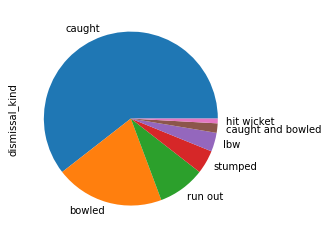

In [5]:
#plotting the Dismissal kind of DA Warner
df_warner['dismissal_kind'].value_counts().plot.pie()

In [6]:
# Total 4 hits by david warner
len(df_warner[df_warner['batsman_runs']==4])

459

In [7]:
#total 6 hits by david warner
len(df_warner[df_warner['batsman_runs']==6])

181

#### Creating pie chart of run contribution of DA Warner

In [8]:
#function created to count total runs by different hits
def count(df,runs):
       return len(df_warner[df_warner['batsman_runs']==runs])*runs

In [9]:
#Total run taken by taking 1
print(count(df_warner,1))

1213


In [10]:
#Total run taken by taking 2
print(count(df_warner,2))

542


In [11]:
#Total run taken by taking 3
print(count(df_warner,3))

54


In [12]:
#Total run taken by taking 4
print(count(df_warner,4))

1836


In [13]:
#Total run taken by taking 6
print(count(df_warner,6))

1086


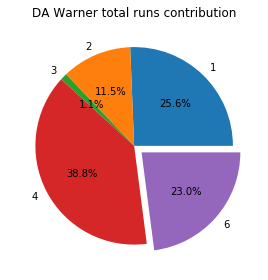

In [14]:
# Plotting the total run distribution of DA Warner
slices=[1213,542,54,1836,1086]
labels=[1,2,3,4,6]
explode=[0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("DA Warner total runs contribution")
plt.tight_layout()
plt.show()

### Score Distribution for Teams by Innings 

In [15]:
# Score Distribution for Teams by innings

#creating abbreviation of each team name
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [16]:
#definning  a dictionary 
Teams={
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GJ', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DCS', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS', 'Delhi Capitals':'DC'
    
}

In [17]:
#Mapping team abbreviation
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [18]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
#summation of total runs of each team by there innings 
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GJ,183
5,3,2,KKR,184
6,4,1,RPS,163
7,4,2,KXIP,164
8,5,1,RCB,157
9,5,2,DD,142


In [21]:
#dropping math id from runs dataframe
runs.drop('match_id',axis=1,inplace=True)

In [22]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

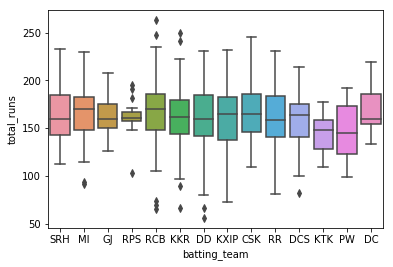

In [23]:
# plotting the batting performance of team as per innings 
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

From above box plot we conclude following points:

1.Batting by RCB and CSK seems to be best.

2.In some cases RCB scores near by 250.

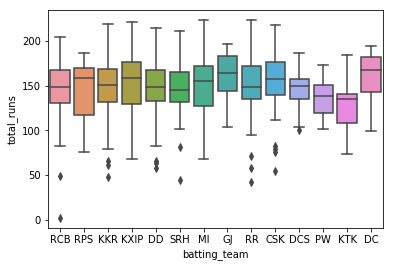

In [24]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

### Calculating number of times teams score more than 200

In [25]:
# creating a dataframe high_scores having following columns as given below with total number of total_runs 
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GJ,KKR,183
5,3,2,KKR,GJ,184
6,4,1,RPS,KXIP,163
7,4,2,KXIP,RPS,164
8,5,1,RCB,DD,157
9,5,2,DD,RCB,142


In [26]:
# Applying condition to get teams having score more than 200 runs 
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GJ,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
82,41,1,GJ,DD,208
83,41,2,DD,GJ,214
88,44,1,MI,DD,212
100,50,1,KXIP,MI,230
101,50,2,MI,KXIP,223


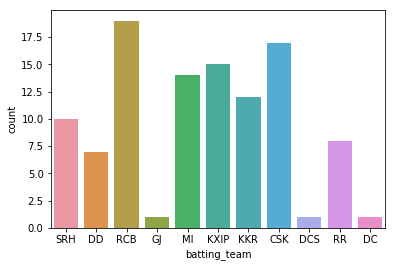

In [27]:
#visualisation of above data
sns.countplot(score_200['batting_team'])

From the above bargraph we conclude most of the runs above 200 is scores by team RCB

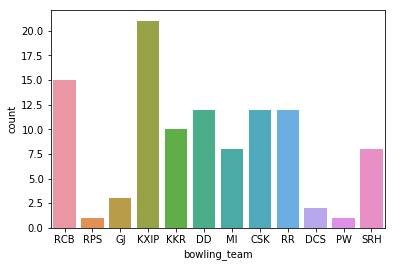

In [28]:
#bowling team scoring above 200 runs
sns.countplot(score_200['bowling_team'])

In Bowling team most of the score above 200 is made by Kings XI Punjab 

## Batsman Comparison

In this comparison we have to get different data related to batsman such as-

1.How many balls played by each batsman?

2.How many runs made by each batsman?

3.Total boundaries hit by each batsman?

4.Strike rate of each of the batsman?

In [29]:
#balls played by each batsman 
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
5,A Flintoff,57
6,A Hales,119
7,A Joseph,13
8,A Kumble,49
9,A Mishra,410


In [30]:
#total runs made by each of the batsman 
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
5,A Flintoff,62
6,A Hales,152
7,A Joseph,15
8,A Kumble,35
9,A Mishra,368


In [31]:
# dataframe of data where batsman hit 4
four=df[df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
33,1,1,SRH,RCB,6,2,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
35,1,1,SRH,RCB,6,4,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
36,1,1,SRH,RCB,6,5,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
63,1,1,SRH,RCB,11,2,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
72,1,1,SRH,RCB,12,5,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [32]:
#total 4 hit by each batsman 
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
5,A Joseph,2
6,A Kumble,3
7,A Mishra,30
8,A Mithun,4
9,A Mukund,1


In [33]:
# creating dataframe having 6 hits by batsman
six=df[df['batsman_runs']==6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
105,1,1,SRH,RCB,18,1,DJ Hooda,Yuvraj Singh,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
115,1,1,SRH,RCB,19,3,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
121,1,1,SRH,RCB,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
124,1,1,SRH,RCB,20,6,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
142,1,2,RCB,SRH,3,6,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [34]:
#total 6 hit by each batsman 
runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Hales,6
4,A Mishra,5
5,A Mithun,1
6,A Nehra,1
7,A Symonds,41
8,AA Jhunjhunwala,5
9,AB Agarkar,5


In [35]:
#concatinating and making a dataframe where we have total runs,balls,and number of 4s and 6s hit by each batsman 
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
5,A Flintoff,62,57,2.0,1.0
6,A Hales,152,119,3.0,1.0
7,A Joseph,15,13,30.0,41.0
8,A Kumble,35,49,4.0,5.0
9,A Mishra,368,410,1.0,5.0


In [36]:
#filling Nan with 0
player.fillna(0,inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
5,A Flintoff,62,57,2.0,1.0
6,A Hales,152,119,3.0,1.0
7,A Joseph,15,13,30.0,41.0
8,A Kumble,35,49,4.0,5.0
9,A Mishra,368,410,1.0,5.0


In [37]:
#strike rate
player['strike_rate']=(player['batsman_runs']/player['ball'])*100
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000
5,A Flintoff,62,57,2.0,1.0,108.771930
6,A Hales,152,119,3.0,1.0,127.731092
7,A Joseph,15,13,30.0,41.0,115.384615
8,A Kumble,35,49,4.0,5.0,71.428571
9,A Mishra,368,410,1.0,5.0,89.756098


In [38]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
5,1,KM Jadhav,RCB,31
6,1,MC Henriques,SRH,52
7,1,Mandeep Singh,RCB,24
8,1,S Aravind,RCB,0
9,1,S Dhawan,SRH,40


In [39]:
#maximum runs by each of the batsman
max=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Dananjaya,4
5,A Flintoff,24
6,A Hales,48
7,A Joseph,15
8,A Kumble,8
9,A Mishra,31


In [40]:
#appending our new dataframe with the player dataframe
player2=pd.concat([player,max.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,6.0,125.000000,15
4,A Dananjaya,4,5,13.0,5.0,80.000000,4
5,A Flintoff,62,57,2.0,1.0,108.771930,24
6,A Hales,152,119,3.0,1.0,127.731092,48
7,A Joseph,15,13,30.0,41.0,115.384615,15
8,A Kumble,35,49,4.0,5.0,71.428571,8
9,A Mishra,368,410,1.0,5.0,89.756098,31


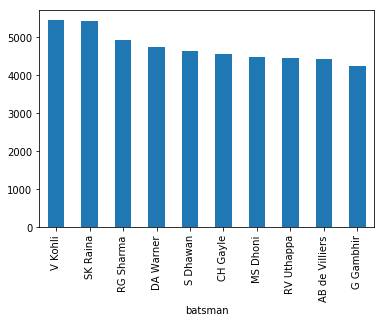

In [41]:
#Top 10 batsman
max_runs=df.groupby('batsman')['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot(kind='bar')

From the above bar graph of top ten batsman on the basis of maximum runs V Kohli and S K raina are the top batsman

In [42]:
#Top Individual Score Batsman
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


from the above top 10 list we conclude that RCB has the best batsman in its team.

In [43]:
#highest wicket taker
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [44]:
dismissal_kinds=['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [45]:
hwt=df[df['dismissal_kind'].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


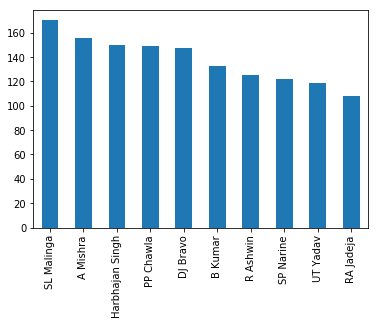

In [46]:
hwt['bowler'].value_counts()[:10].plot(kind='bar')

From the above chart we conclude that SL MAlinga leads the chart of taking maximum number of wickets.